In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.figure_format='svg'

import numpy as np
np.set_printoptions(precision=6, suppress=True)
np.set_printoptions(threshold=np.inf)

from shl_scripts.shl_experiments import SHL
from classification import SparseClassif


In [2]:
tag ='2017-06-01_MNIST_SN_DEBUG_'
DEBUG_DOWNSCALE, verbose = 10, 10
tag ='2017-06-01_MNIST_SN_'
DEBUG_DOWNSCALE, verbose = 1, 10
patch_size = (28,28)
n_dictionary = 15**2
l0_sparseness = 15
n_iter = 2**14
eta = 0.01
eta_homeo = 0.01
alpha_homeo = 0.02
n_hidden = 30
list_figures=['show_dico']

 ----- learning for the dico of size : 144 -----
loading the dico called : 2017-06-01_MNIST_SN_n_dictionary144
loading the code called : /Users/laurentperrinet/tmp/data_cache/2017-06-01_MNIST_SN_n_dictionary144_coding.npy
loading the code called : /Users/laurentperrinet/tmp/data_cache/2017-06-01_MNIST_SN_n_dictionary144_coding.npy
loading the code called : /Users/laurentperrinet/tmp/data_cache/2017-06-01_MNIST_SN_n_dictionary144_coding.npy
loading the code called : /Users/laurentperrinet/tmp/data_cache/2017-06-01_MNIST_SN_n_dictionary144_coding.npy
 ----- learning for the dico of size : 225 -----
loading the dico called : 2017-06-01_MNIST_SN_n_dictionary225
loading the code called : /Users/laurentperrinet/tmp/data_cache/2017-06-01_MNIST_SN_n_dictionary225_coding.npy
loading the code called : /Users/laurentperrinet/tmp/data_cache/2017-06-01_MNIST_SN_n_dictionary225_coding.npy
loading the code called : /Users/laurentperrinet/tmp/data_cache/2017-06-01_MNIST_SN_n_dictionary225_coding.npy
l

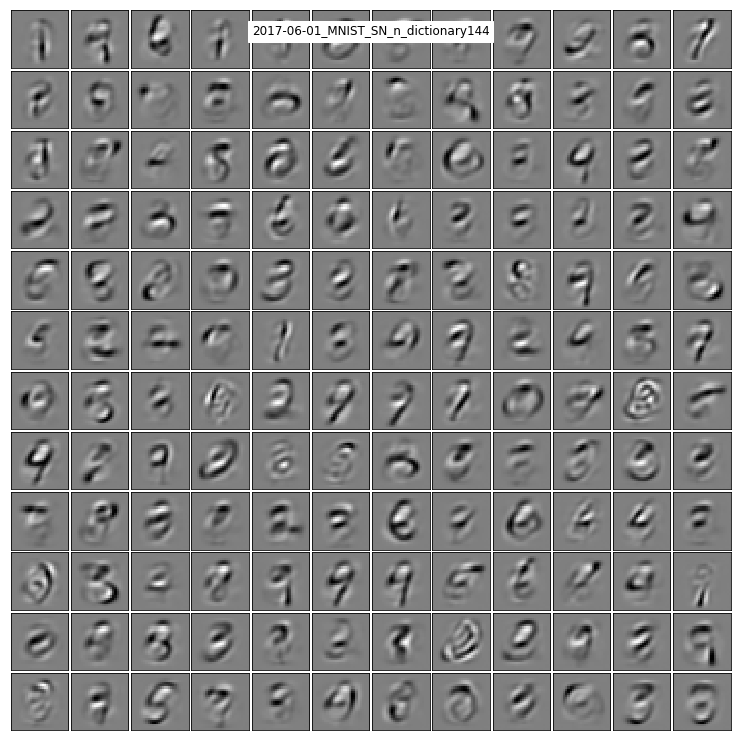

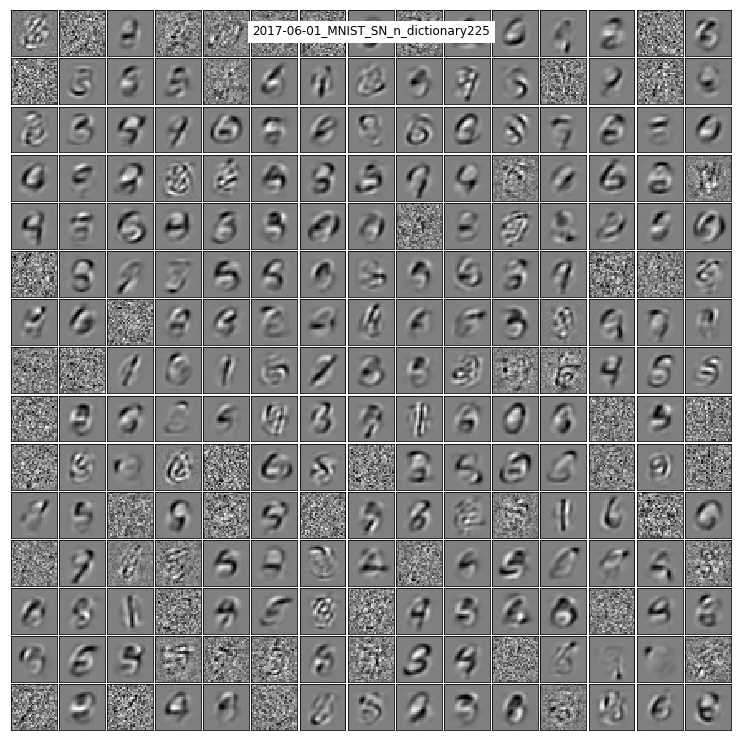

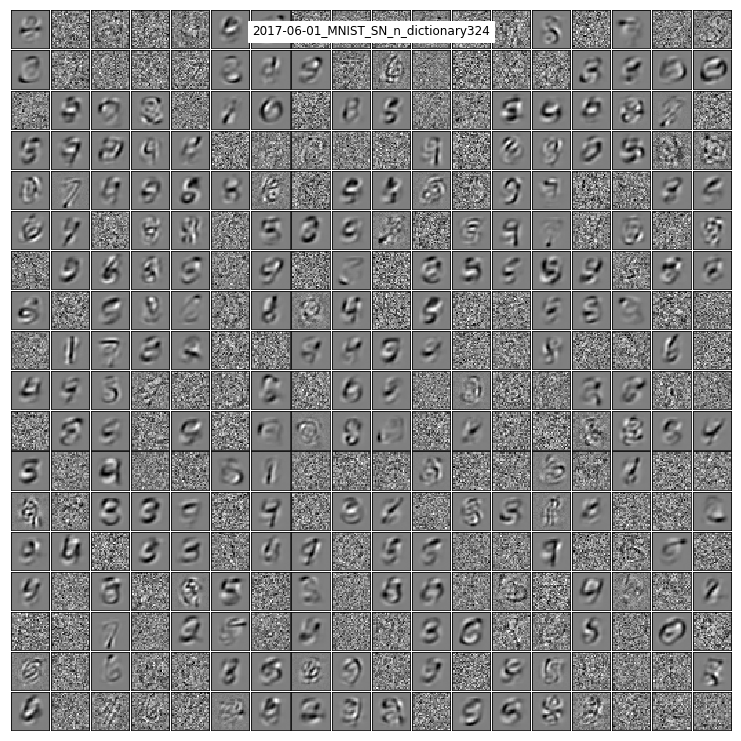

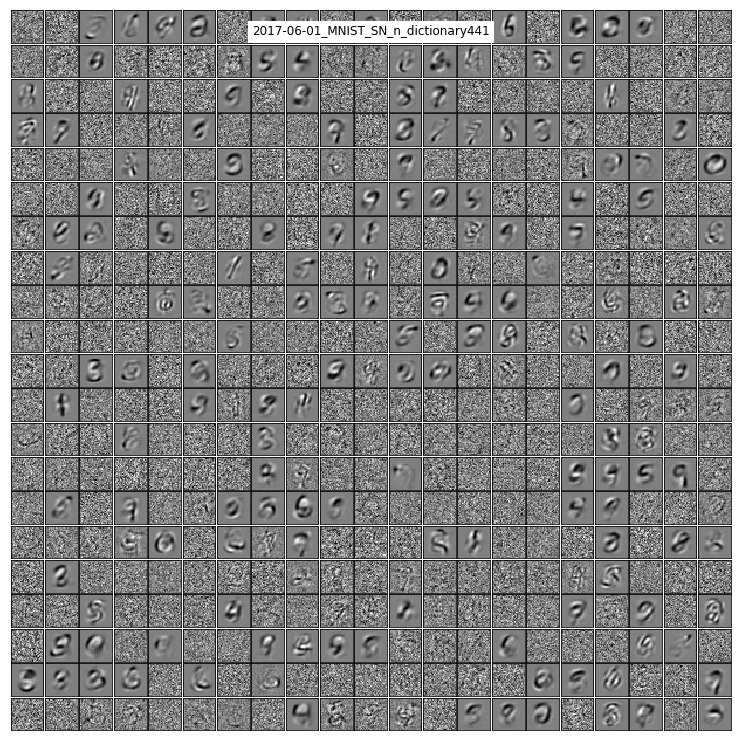

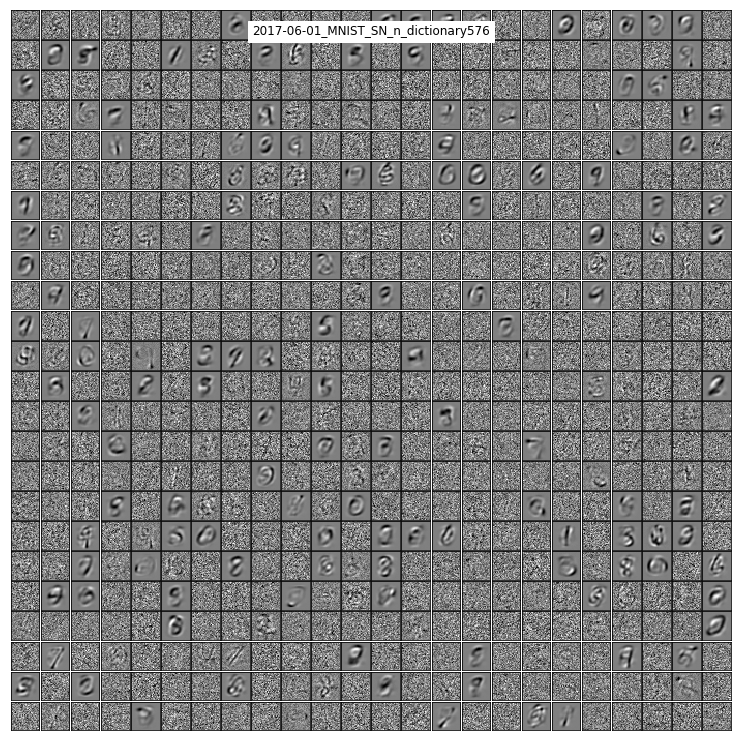

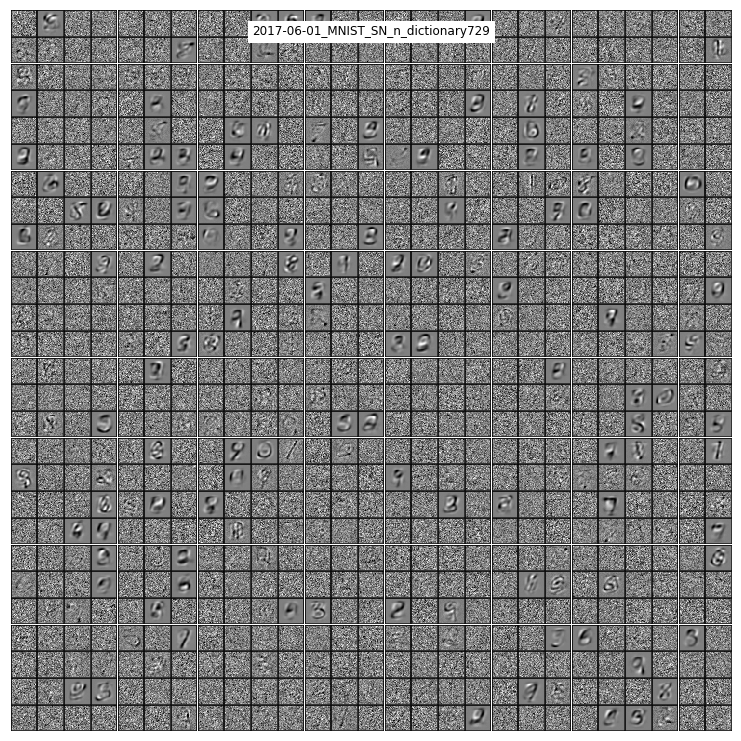

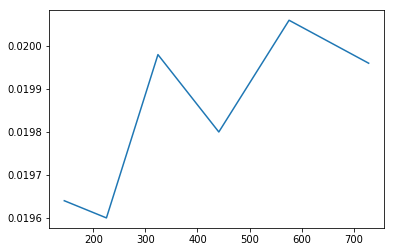

In [3]:
results = []
n_dictionarys = np.arange(12, 30, 3)**2
for n_dictionary_ in n_dictionarys:
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
                eta = eta, eta_homeo = eta_homeo, verbose = verbose, 
                n_iter = n_iter, patch_size = patch_size, l0_sparseness=l0_sparseness, alpha_homeo = alpha_homeo,
                n_dictionary = n_dictionary_) 
    matname = tag + 'n_dictionary' + str(n_dictionary_)
    
    sc = SparseClassif(shl, matname)
    print(" ----- learning for the dico of size : {0} -----".format(n_dictionary_))
    sc.dico = shl.learn_dico(data=sc.training_image, matname=matname, list_figures=list_figures)       
    sc.learn()
    results.append(sc.result())

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(n_dictionarys, results)    

loading the dico called : 2017-06-01_MNIST_SN_l0_sparseness=5
loading the code called : /Users/laurentperrinet/tmp/data_cache/2017-06-01_MNIST_SN_n_dictionary729_coding.npy
loading the code called : /Users/laurentperrinet/tmp/data_cache/2017-06-01_MNIST_SN_n_dictionary729_coding.npy
loading the code called : /Users/laurentperrinet/tmp/data_cache/2017-06-01_MNIST_SN_n_dictionary729_coding.npy
loading the code called : /Users/laurentperrinet/tmp/data_cache/2017-06-01_MNIST_SN_n_dictionary729_coding.npy
loading the dico called : 2017-06-01_MNIST_SN_l0_sparseness=10
loading the code called : /Users/laurentperrinet/tmp/data_cache/2017-06-01_MNIST_SN_l0_sparseness=5_coding.npy
loading the code called : /Users/laurentperrinet/tmp/data_cache/2017-06-01_MNIST_SN_l0_sparseness=5_coding.npy


ValueError: cannot reshape array of size 225 into shape (729,1)

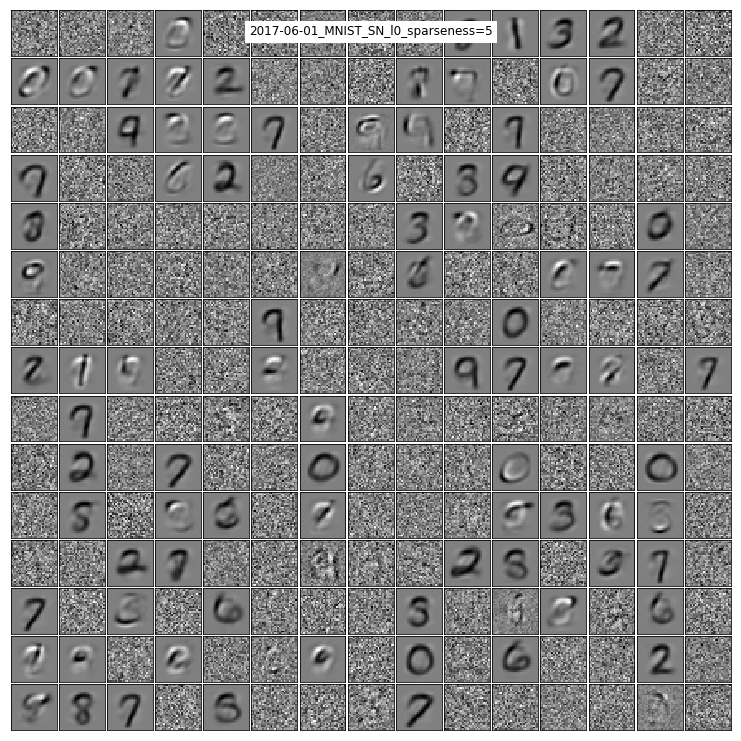

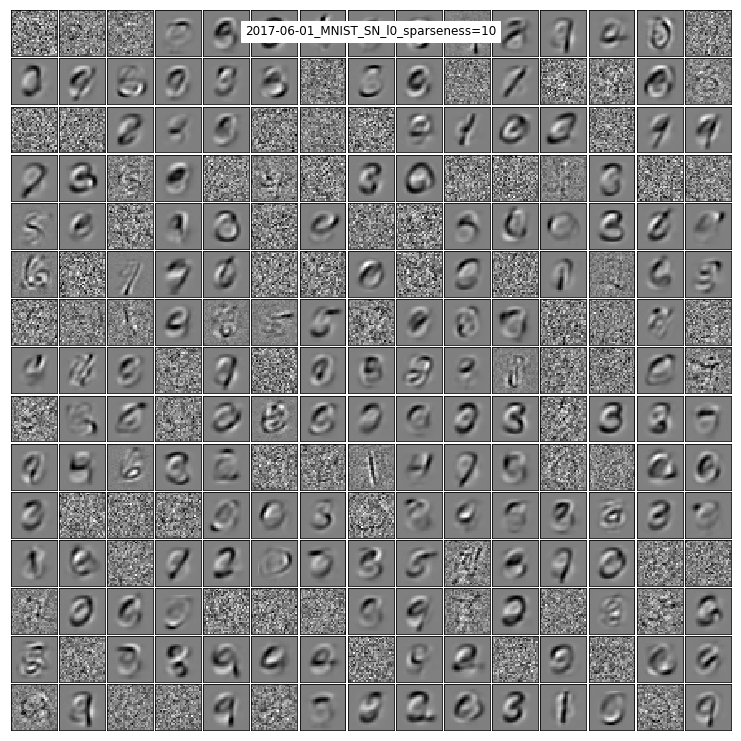

In [4]:
results = []
l0_sparsenesses =  np.arange(5, 40, 5)

for l0_sparseness_ in l0_sparsenesses:
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
                eta = eta, eta_homeo = eta_homeo, verbose = verbose, 
                n_iter = n_iter, patch_size = patch_size, l0_sparseness=l0_sparseness_, alpha_homeo = alpha_homeo,
                n_dictionary = n_dictionary)     
    sc = SparseClassif(shl, matname)
    matname = tag + 'l0_sparseness=' + str(l0_sparseness_)
    sc.dico = shl.learn_dico(data=sc.training_image, matname=matname, list_figures=list_figures)       
    sc.learn()
    results.append(sc.result())

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(l0_sparsenesses, results)        